<a href="https://colab.research.google.com/github/Akshay352005/cf/blob/main/dvp%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving c2001.csv to c2001.csv
Saving c2002.csv to c2002.csv
Saving c2003.csv to c2003.csv
Saving c2004.csv to c2004.csv
Saving c2034.csv to c2034.csv
Saving c2053.csv to c2053.csv
Saving c2054.csv to c2054.csv
Saving c2066.csv to c2066.csv
Saving c2078.csv to c2078.csv
Saving c2079.csv to c2079.csv
Saving c2085.csv to c2085.csv
Saving c2087.csv to c2087.csv
Saving c2089.csv to c2089.csv
Saving c2091.csv to c2091.csv
Saving c2092.csv to c2092.csv
Saving c2093.csv to c2093.csv
Saving c2095.csv to c2095.csv
Saving c2102.csv to c2102.csv
Saving c2108.csv to c2108.csv
Saving c2112.csv to c2112.csv
Saving c2119.csv to c2119.csv
Saving c2121.csv to c2121.csv
Saving c2127.csv to c2127.csv
Saving c2129.csv to c2129.csv
Saving c2147.csv to c2147.csv
Saving c2150.csv to c2150.csv
Saving c2151.csv to c2151.csv
Saving c2153.csv to c2153.csv
Saving c2155.csv to c2155.csv
Saving c2156.csv to c2156.csv
Saving c2157.csv to c2157.csv
Saving c2172.csv to c2172.csv
Saving c2186.csv to c2186.csv
Saving c21

**Reasoning**:
Generate more graph types to reach the target of at least 8 different graphs. Utilize the time-series data in `df_worldbank_gdp` and explore other visualization possibilities with the available dataframes (`df_world_data_2023`, `df_c2004`, `df_c2001`). Consider visualizations that show trends over time, distributions, or comparisons across countries.

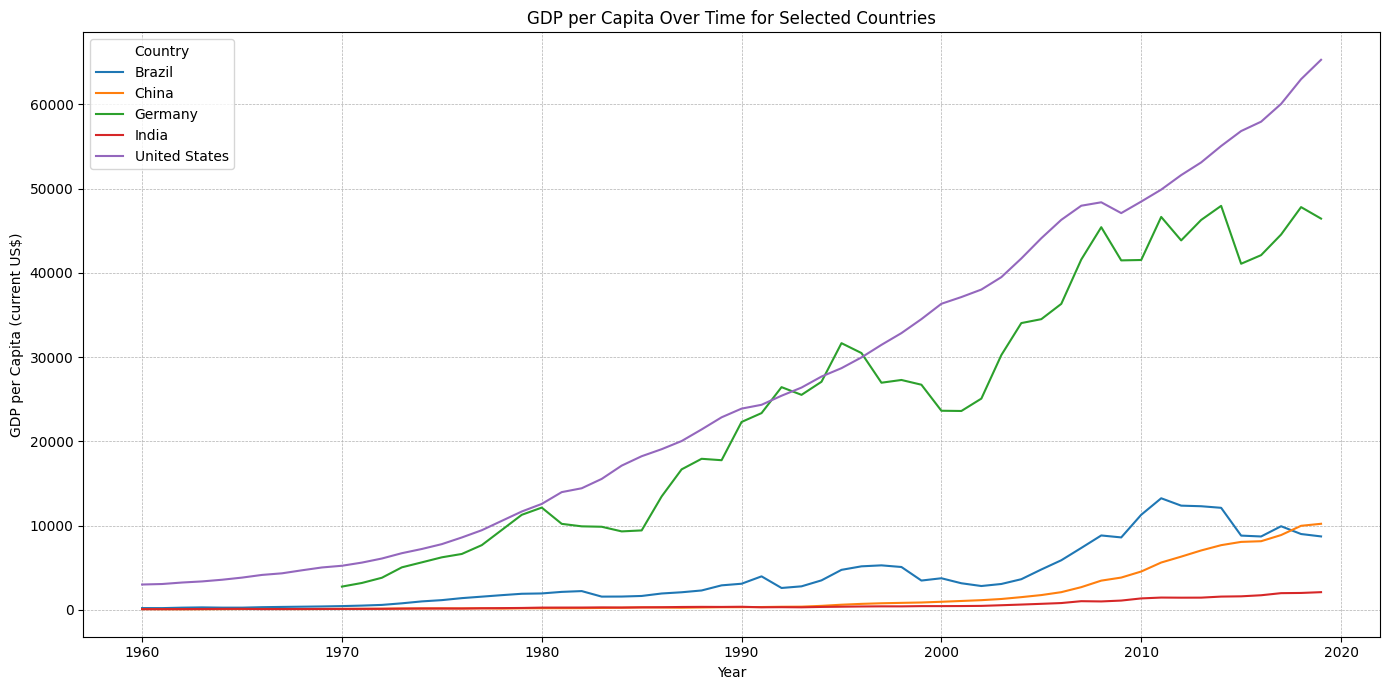

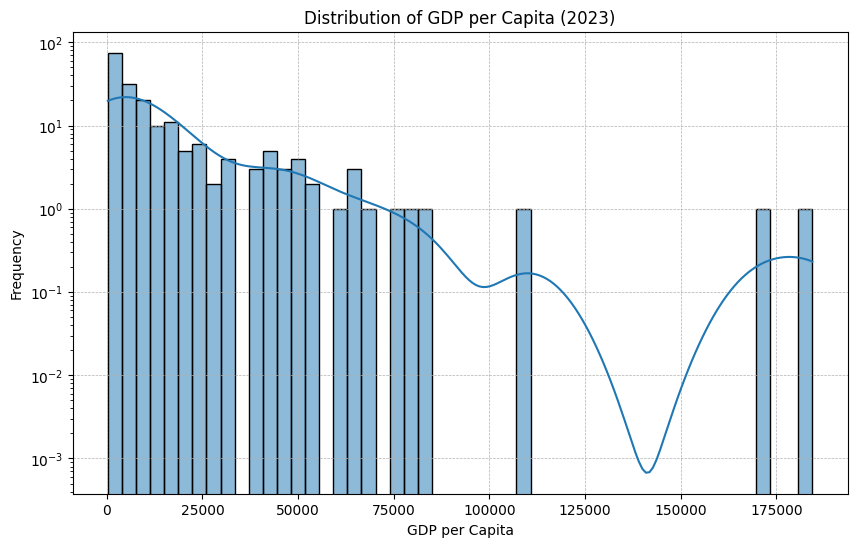

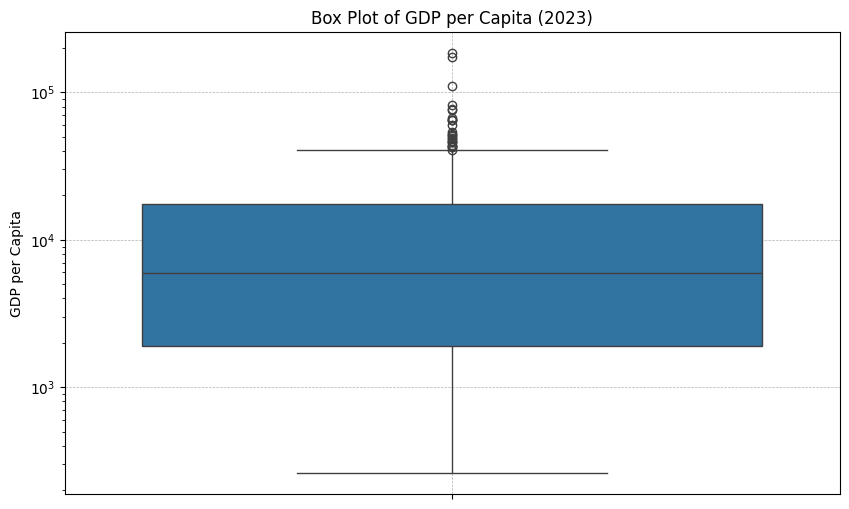

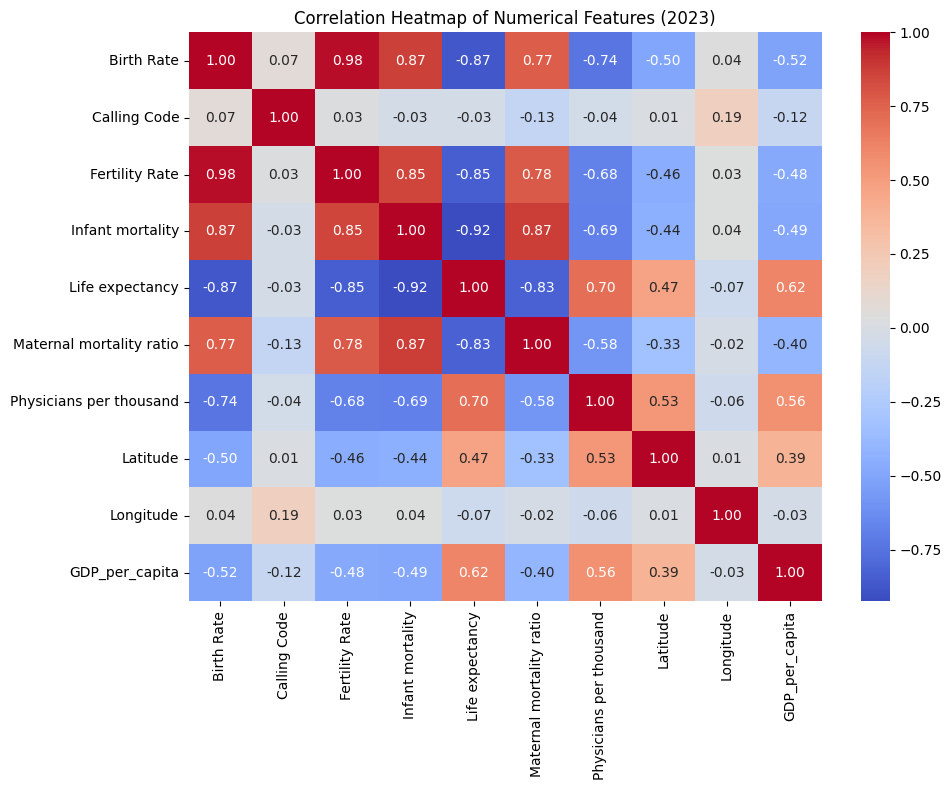

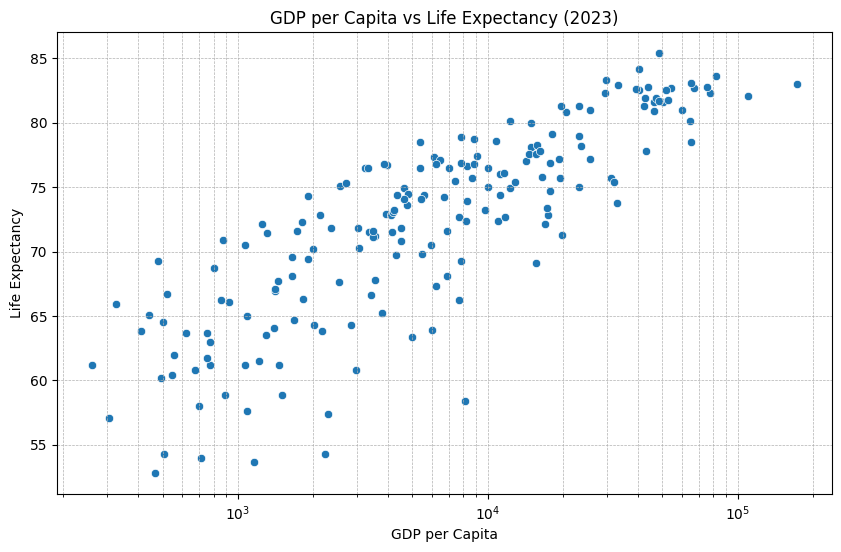

In [ ]:
# 4. Line plot of GDP per capita over time for a few selected countries from df_worldbank_gdp

if df_worldbank_gdp is not None and 'Country Name' in df_worldbank_gdp.columns and 'Indicator Name' in df_worldbank_gdp.columns:
    gdp_per_capita_annual = df_worldbank_gdp[df_worldbank_gdp['Indicator Name'] == 'GDP per capita (current US$)']

    # Select a few countries for demonstration
    selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
    gdp_per_capita_selected_countries = gdp_per_capita_annual[gdp_per_capita_annual['Country Name'].isin(selected_countries)]

    # Reshape the dataframe for plotting
    years = [col for col in gdp_per_capita_selected_countries.columns if col.isdigit()]
    gdp_per_capita_time_series = gdp_per_capita_selected_countries.melt(id_vars=['Country Name'], value_vars=years, var_name='Year', value_name='GDP_per_capita')
    gdp_per_capita_time_series['Year'] = pd.to_numeric(gdp_per_capita_time_series['Year'])

    plt.figure(figsize=(14, 7))
    sns.lineplot(data=gdp_per_capita_time_series, x='Year', y='GDP_per_capita', hue='Country Name')
    plt.title('GDP per Capita Over Time for Selected Countries')
    plt.xlabel('Year')
    plt.ylabel('GDP per Capita (current US$)')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(title='Country')
    plt.tight_layout()
    plt.show()
else:
    print("df_worldbank_gdp not available or missing required columns for time series plot.")

# 5. Histogram of GDP per capita (2023) from df_world_data_2023 to see the distribution
if df_world_data_2023 is not None and 'GDP_per_capita' in df_world_data_2023.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_world_data_2023['GDP_per_capita'].dropna(), bins=50, kde=True)
    plt.title('Distribution of GDP per Capita (2023)')
    plt.xlabel('GDP per Capita')
    plt.ylabel('Frequency')
    plt.yscale('log') # Use log scale for frequency due to potential skewed distribution
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("df_world_data_2023 not available or missing 'GDP_per_capita' column for histogram.")

# 6. Box plot of GDP per capita (2023) from df_world_data_2023 to visualize quartiles and outliers
if df_world_data_2023 is not None and 'GDP_per_capita' in df_world_data_2023.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df_world_data_2023['GDP_per_capita'].dropna())
    plt.title('Box Plot of GDP per Capita (2023)')
    plt.ylabel('GDP per Capita')
    plt.yscale('log') # Use log scale due to large range of GDP per capita values
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("df_world_data_2023 not available or missing 'GDP_per_capita' column for box plot.")

# 7. Consider a heatmap of correlations if there are multiple numerical columns in df_world_data_2023
if df_world_data_2023 is not None:
    # Select a few numerical columns for correlation analysis
    numerical_cols = df_world_data_2023.select_dtypes(include=['float64', 'int64']).columns
    # Exclude the cleaned population and GDP columns that were created
    numerical_cols = [col for col in numerical_cols if col not in ['GDP_cleaned', 'Population_cleaned']]

    if len(numerical_cols) > 1:
        plt.figure(figsize=(10, 8))
        correlation_matrix = df_world_data_2023[numerical_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap of Numerical Features (2023)')
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough numerical columns in df_world_data_2023 to generate a correlation heatmap.")
else:
    print("df_world_data_2023 not available for correlation heatmap.")

# 8. Scatter plot of GDP per capita (2023) vs Life Expectancy (2023) from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_per_capita' in df_world_data_2023.columns and 'Life expectancy' in df_world_data_2023.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_world_data_2023, x='GDP_per_capita', y='Life expectancy')
    plt.title('GDP per Capita vs Life Expectancy (2023)')
    plt.xlabel('GDP per Capita')
    plt.ylabel('Life Expectancy')
    plt.xscale('log') # Use log scale for GDP per capita
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("df_world_data_2023 not available or missing required columns for GDP per capita vs Life Expectancy scatter plot.")

## Generate different graph types

### Subtask:
Create code cells to generate at least 8 different types of graphs using appropriate libraries (e.g., Matplotlib, Seaborn, Plotly) based on the loaded data.

**Reasoning**:
Generate visualizations to explore the relationships and distributions of GDP and GDP per capita across countries using the cleaned dataframes. Start with a scatter plot to see the relationship between GDP and GDP per capita from `df_world_data_2023`, a bar chart for the top N countries by GDP per capita from `df_c2004`, and a bar chart for the top N countries by GDP from `df_c2001`.

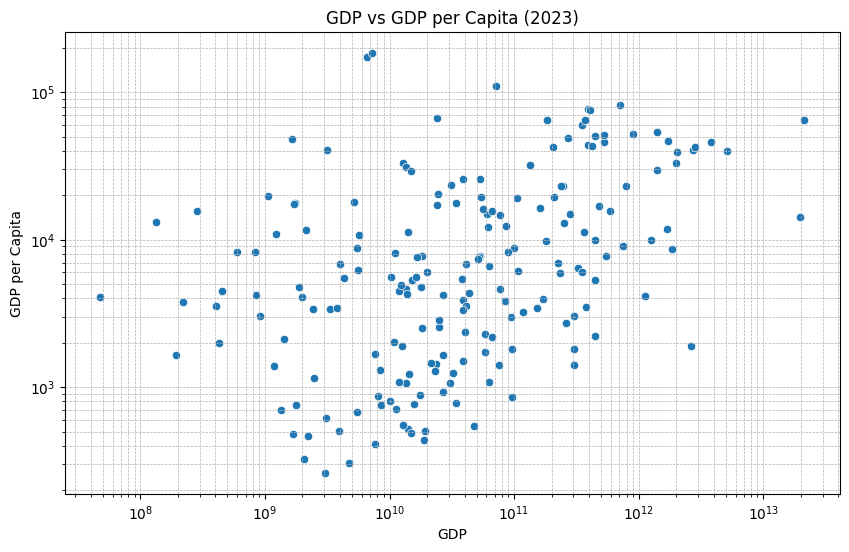

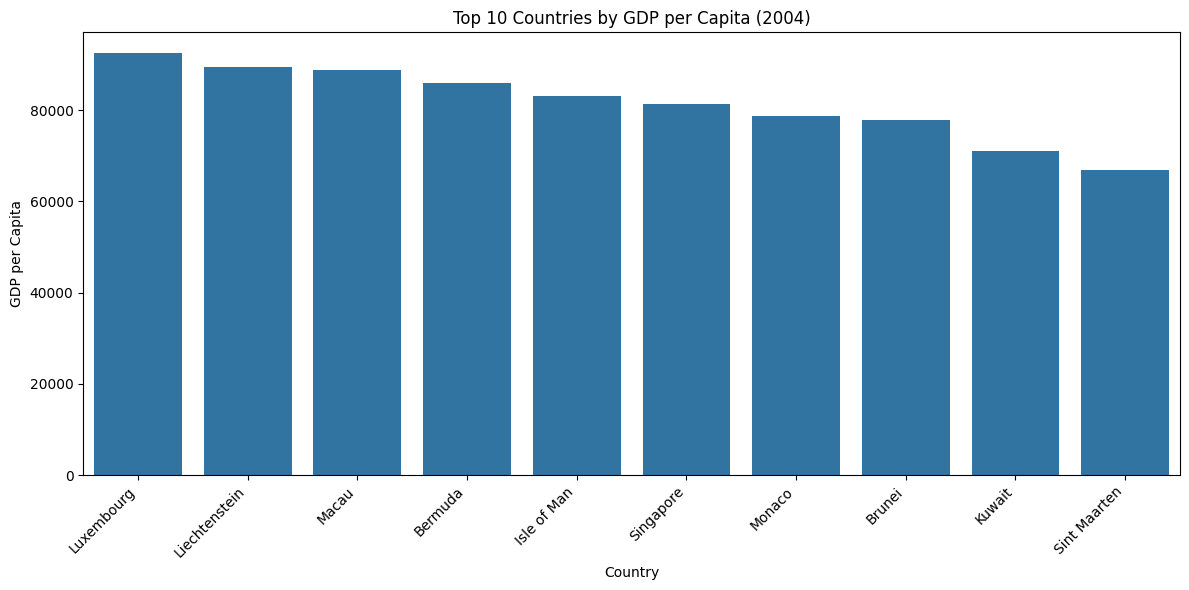

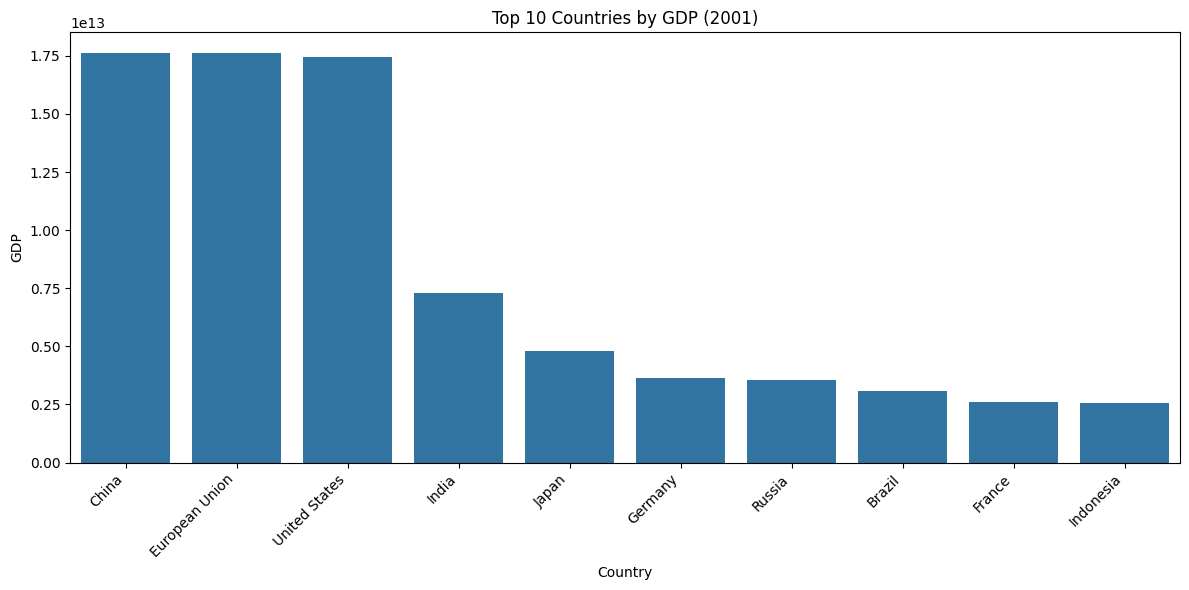

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of GDP vs GDP per capita from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_cleaned' in df_world_data_2023.columns and 'GDP_per_capita' in df_world_data_2023.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_world_data_2023, x='GDP_cleaned', y='GDP_per_capita')
    plt.title('GDP vs GDP per Capita (2023)')
    plt.xlabel('GDP')
    plt.ylabel('GDP per Capita')
    plt.xscale('log') # Use log scale due to large range of GDP values
    plt.yscale('log') # Use log scale due to large range of GDP per capita values
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("df_world_data_2023 not available or missing required columns for scatter plot.")

# 2. Bar chart of Top 10 Countries by GDP per capita from df_c2004
if df_c2004 is not None and 'Value_cleaned' in df_c2004.columns and 'Name' in df_c2004.columns:
    df_top_gdp_per_capita_2004 = df_c2004.nlargest(10, 'Value_cleaned')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_per_capita_2004)
    plt.title('Top 10 Countries by GDP per Capita (2004)')
    plt.xlabel('Country')
    plt.ylabel('GDP per Capita')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("df_c2004 not available or missing required columns for top GDP per capita chart.")

# 3. Bar chart of Top 10 Countries by GDP from df_c2001
if df_c2001 is not None and 'Value_cleaned' in df_c2001.columns and 'Name' in df_c2001.columns:
    df_top_gdp_2001 = df_c2001.nlargest(10, 'Value_cleaned')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_2001)
    plt.title('Top 10 Countries by GDP (2001)')
    plt.xlabel('Country')
    plt.ylabel('GDP')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("df_c2001 not available or missing required columns for top GDP chart.")

## Load and prepare data

### Subtask:
Identify relevant columns, clean data, and prepare it for visualization, potentially merging dataframes as needed.

**Reasoning**:
Identify columns related to GDP, GDP per capita, and potentially hunger in the loaded dataframes. Clean any columns that need it (e.g., removing '$' or ',' from numeric columns and converting to numeric types).

In [ ]:
# Inspecting df_world_data_2023 for relevant columns
print("Columns in df_world_data_2023:")
print(df_world_data_2023.columns)

# Inspecting df_c2004 and df_c2001
print("\nColumns in df_c2004:")
print(df_c2004.columns)

print("\nColumns in df_c2001:")
print(df_c2001.columns)

# Clean 'Value' column in df_c2004 and df_c2001
def clean_currency(s):
    if isinstance(s, str):
        return s.replace('$', '').replace(',', '')
    return s

if df_c2004 is not None and 'Value' in df_c2004.columns:
    df_c2004['Value_cleaned'] = df_c2004['Value'].apply(clean_currency)
    df_c2004['Value_cleaned'] = pd.to_numeric(df_c2004['Value_cleaned'], errors='coerce')
    print("\nCleaned 'Value' column in df_c2004:")
    display(df_c2004.head())
    print(df_c2004.info())


if df_c2001 is not None and 'Value' in df_c2001.columns:
    df_c2001['Value_cleaned'] = df_c2001['Value'].apply(clean_currency)
    df_c2001['Value_cleaned'] = pd.to_numeric(df_c2001['Value_cleaned'], errors='coerce')
    print("\nCleaned 'Value' column in df_c2001:")
    display(df_c2001.head())
    print(df_c2001.info())


# Clean 'GDP' and 'Population' columns in df_world_data_2023 and calculate GDP per capita
if df_world_data_2023 is not None and 'GDP' in df_world_data_2023.columns and 'Population' in df_world_data_2023.columns:
    df_world_data_2023['GDP_cleaned'] = df_world_data_2023['GDP'].astype(str).apply(clean_currency)
    df_world_data_2023['GDP_cleaned'] = pd.to_numeric(df_world_data_2023['GDP_cleaned'], errors='coerce')

    df_world_data_2023['Population_cleaned'] = df_world_data_2023['Population'].astype(str).apply(clean_currency)
    df_world_data_2023['Population_cleaned'] = pd.to_numeric(df_world_data_2023['Population_cleaned'], errors='coerce')

    df_world_data_2023['GDP_per_capita'] = df_world_data_2023['GDP_cleaned'] / df_world_data_2023['Population_cleaned']
    print("\nCleaned 'GDP' and 'Population' and calculated 'GDP_per_capita' in df_world_data_2023:")
    display(df_world_data_2023[['Country', 'GDP_cleaned', 'Population_cleaned', 'GDP_per_capita']].head())
    print(df_world_data_2023[['Country', 'GDP_cleaned', 'Population_cleaned', 'GDP_per_capita']].info())

Columns in df_world_data_2023:
Index(['Country', 'Density (P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

Columns in df_c2004:
Index(['Pos', 'Name', 'Value'], dtype='object')

Columns in df_c2001:
Index(['Pos', 'Name', 'Value'], dtype='object')

Cleane

,Pos,Name,Value,Value_cleaned
0,1,Qatar,NaN,NaN
1,2,Luxembourg,$92400,92400.0
2,3,Liechtenstein,$89400,89400.0
3,4,Macau,$88700,88700.0
4,5,Bermuda,$86000,86000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pos            230 non-null    int64  
 1   Name           230 non-null    object 
 2   Value          229 non-null    object 
 3   Value_cleaned  229 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.3+ KB
None

Cleaned 'Value' column in df_c2001:


,Pos,Name,Value,Value_cleaned
0,1,China,$17630000000000,17630000000000
1,2,European Union,$17610000000000,17610000000000
2,3,United States,$17460000000000,17460000000000
3,4,India,$7277000000000,7277000000000
4,5,Japan,$4807000000000,4807000000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pos            230 non-null    int64 
 1   Name           230 non-null    object
 2   Value          230 non-null    object
 3   Value_cleaned  230 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.3+ KB
None

Cleaned 'GDP' and 'Population' and calculated 'GDP_per_capita' in df_world_data_2023:


,Country,GDP_cleaned,Population_cleaned,GDP_per_capita
0,Afghanistan,1.910135e+10,38041754.0,502.115487
1,Albania,1.527808e+10,2854191.0,5352.857411
2,Algeria,1.699882e+11,43053054.0,3948.343279
3,Andorra,3.154058e+09,77142.0,40886.391162
4,Angola,9.463542e+10,31825295.0,2973.591160


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             195 non-null    object 
 1   GDP_cleaned         193 non-null    float64
 2   Population_cleaned  194 non-null    float64
 3   GDP_per_capita      193 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.2+ KB
None


from matplotlib import pyplot as plt
_df_0['GDP_cleaned'].plot(kind='hist', bins=20, title='GDP_cleaned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Population_cleaned'].plot(kind='hist', bins=20, title='Population_cleaned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['GDP_per_capita'].plot(kind='hist', bins=20, title='GDP_per_capita')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='GDP_cleaned', y='Population_cleaned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Population_cleaned', y='GDP_per_capita', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['GDP_cleaned'].plot(kind='line', figsize=(8, 4), title='GDP_cleaned')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Population_cleaned'].plot(kind='line', figsize=(8, 4), title='Population_cleaned')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['GDP_per_capita'].plot(kind='line', figsize=(8, 4), title='GDP_per_capita')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='GDP_cleaned', y='Country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Population_cleaned', y='Country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='GDP_per_capita', y='Country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd

file_path = '/content/worldbank_gdp.csv'

try:
    # Attempt to read the CSV, skipping the first 4 rows
    df_worldbank_gdp = pd.read_csv(file_path, skiprows=4)
    print(f"\nSuccessfully loaded: {file_path}")
    display(df_worldbank_gdp.head())
    print(df_worldbank_gdp.info())
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"Error loading {file_path}: {e}")


Successfully loaded: /content/worldbank_gdp.csv


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24713.698045,26189.435509,26647.938101,27980.880695,28281.350482,29007.693003,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,641.871479,637.165523,613.856689,578.466353,509.218661,519.884773,493.750418,507.103432,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664,2790.726615,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5353.244856,NaN,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,38686.461264,39538.766722,41303.929371,35762.523074,37474.665406,38962.880354,41793.055258,40886.391165,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            131 non-null    float64
 5   1961            132 non-null    float64
 6   1962            135 non-null    float64
 7   1963            135 non-null    float64
 8   1964            135 non-null    float64
 9   1965            144 non-null    float64
 10  1966            148 non-null    float64
 11  1967            152 non-null    float64
 12  1968            156 non-null    float64
 13  1969            156 non-null    float64
 14  1970            167 non-null    float64
 15  1971            168 non-null    float64
 16  1972            168 non-null    float64
 17  1973            168 non-null    flo

In [ ]:
file_path = '/content/worldbank_gdp.csv'

try:
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            print(f"Line {i+1}: {line.strip()}")
            if i > 10: # Print only the first few lines to avoid excessive output
                break
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Line 1: ﻿"Data Source","World Development Indicators",
Line 2: 
Line 3: "Last Updated Date","2021-03-19",
Line 4: 
Line 5: "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020",
Line 6: "Aruba","ABW","GDP per capita (current US$)","NY.GDP.PCAP.CD","","","","","","","","","","","","","","","","","","","","","","","","","","","6472.50202920407","7885.79654466735","9764.78997879329","11392.4558105764","12307.3117378314","13496.0031426418","14046.5037643078","14936.8272187795","16241.0465209443","16439.3563609282","16586.0684357542","17927.7496352086","19078.34

In [ ]:
import pandas as pd

file_path = '/content/worldbank_gdp.csv'

try:
    # Attempt to read the CSV, skipping bad lines
    df_worldbank_gdp = pd.read_csv(file_path, error_bad_lines=False)
    print(f"\nSuccessfully loaded: {file_path}")
    display(df_worldbank_gdp.head())
    print(df_worldbank_gdp.info())
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"Error loading {file_path}: {e}")

Error loading /content/worldbank_gdp.csv: read_csv() got an unexpected keyword argument 'error_bad_lines'


In [ ]:
import pandas as pd
import os

file_names = ["worldbank_gdp.csv", "world-data-2023.csv", "c2004.csv", "c2001.csv"]
dataframes = {}

print("Loading and inspecting relevant files:")

for file_name in file_names:
    file_path = f'/content/{file_name}'
    if os.path.exists(file_path):
        try:
            df_name = file_name.replace('.csv', '').replace('-', '_')
            dataframes[df_name] = pd.read_csv(file_path)
            print(f"\nSuccessfully loaded: {file_name}")
            display(dataframes[df_name].head())
            print(dataframes[df_name].info())
        except Exception as e:
            print(f"Error loading {file_name}: {e}")
    else:
        print(f"File not found in /content/: {file_name}")

df_worldbank_gdp = dataframes.get('worldbank_gdp')
df_world_data_2023 = dataframes.get('world_data_2023')
df_c2004 = dataframes.get('c2004')
df_c2001 = dataframes.get('c2001')

Loading and inspecting relevant files:
Error loading worldbank_gdp.csv: Error tokenizing data. C error: Expected 3 fields in line 5, saw 66


Successfully loaded: world-data-2023.csv


,Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density (P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

,Pos,Name,Value
0,1,Qatar,NaN
1,2,Luxembourg,$92400
2,3,Liechtenstein,$89400
3,4,Macau,$88700
4,5,Bermuda,$86000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pos     230 non-null    int64 
 1   Name    230 non-null    object
 2   Value   229 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.5+ KB
None

Successfully loaded: c2001.csv


,Pos,Name,Value
0,1,China,$17630000000000
1,2,European Union,$17610000000000
2,3,United States,$17460000000000
3,4,India,$7277000000000
4,5,Japan,$4807000000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pos     230 non-null    int64 
 1   Name    230 non-null    object
 2   Value   230 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.5+ KB
None


## Combine graphs into a dashboard

### Subtask:
Combine the generated graphs into a dashboard layout.

/tmp/ipython-input-418900838.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_per_capita_2004, ax=axes[1], palette='viridis')
/tmp/ipython-input-418900838.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_2001, ax=axes[2], palette='viridis')


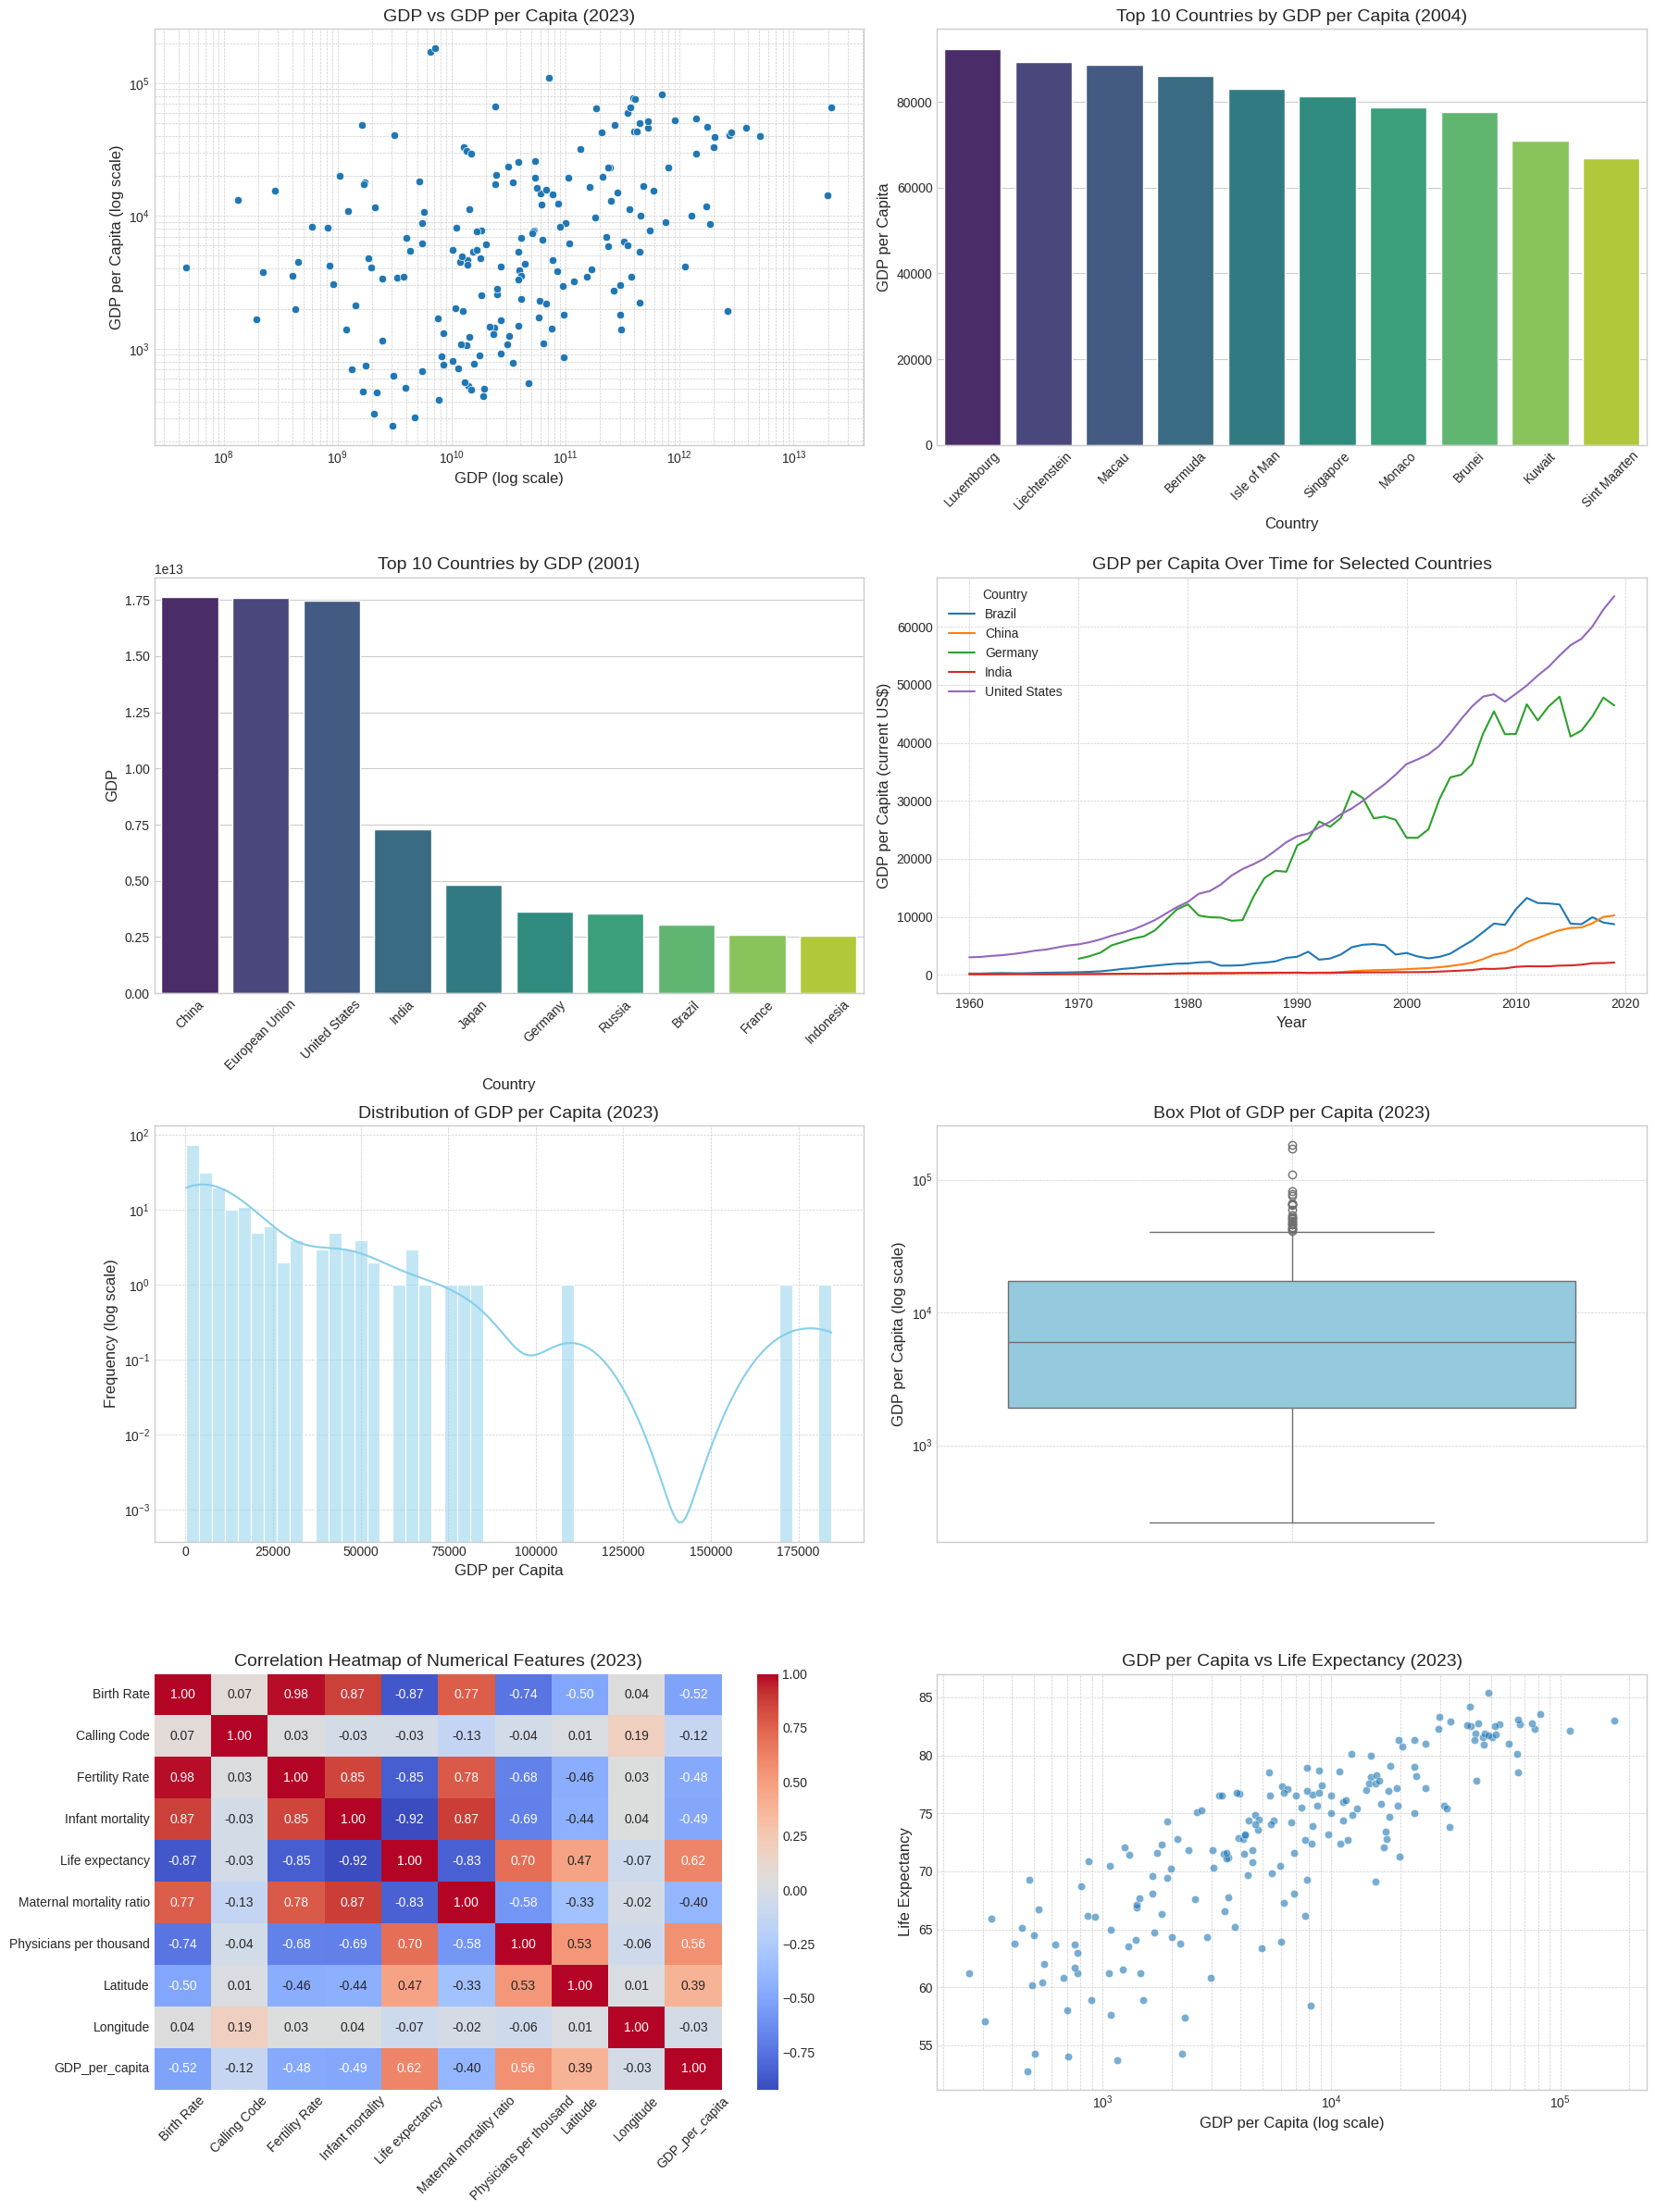

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Make sure seaborn is imported

# Set a professional looking style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')


# Create a figure and a set of subplots
# We'll use a grid layout to arrange the 8 plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 24)) # Increased figsize for better spacing

# Flatten the axes array for easy iteration
axes = axes.flatten()

# We need to regenerate the plots and place them in the subplots
# Due to the way matplotlib works, we'll call the plotting code again,
# but this time we'll pass the specific axis to each plot function.

# Plot 1: Scatter plot of GDP vs GDP per capita from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_cleaned' in df_world_data_2023.columns and 'GDP_per_capita' in df_world_data_2023.columns:
    sns.scatterplot(data=df_world_data_2023, x='GDP_cleaned', y='GDP_per_capita', ax=axes[0])
    axes[0].set_title('GDP vs GDP per Capita (2023)', fontsize=14)
    axes[0].set_xlabel('GDP (log scale)', fontsize=12)
    axes[0].set_ylabel('GDP per Capita (log scale)', fontsize=12)
    axes[0].set_xscale('log') # Use log scale due to large range of GDP values
    axes[0].set_yscale('log') # Use log scale due to large range of GDP per capita values
    axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
else:
    axes[0].set_title('GDP vs GDP per Capita (2023)')
    axes[0].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)

# Plot 2: Bar chart of Top 10 Countries by GDP per capita from df_c2004
if df_c2004 is not None and 'Value_cleaned' in df_c2004.columns and 'Name' in df_c2004.columns:
    df_top_gdp_per_capita_2004 = df_c2004.nlargest(10, 'Value_cleaned')
    sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_per_capita_2004, ax=axes[1], palette='viridis')
    axes[1].set_title('Top 10 Countries by GDP per Capita (2004)', fontsize=14)
    axes[1].set_xlabel('Country', fontsize=12)
    axes[1].set_ylabel('GDP per Capita', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    # axes[1].tight_layout() # Removed
else:
    axes[1].set_title('Top 10 Countries by GDP per Capita (2004)')
    axes[1].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)


# Plot 3: Bar chart of Top 10 Countries by GDP from df_c2001
if df_c2001 is not None and 'Value_cleaned' in df_c2001.columns and 'Name' in df_c2001.columns:
    df_top_gdp_2001 = df_c2001.nlargest(10, 'Value_cleaned')
    sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_2001, ax=axes[2], palette='viridis')
    axes[2].set_title('Top 10 Countries by GDP (2001)', fontsize=14)
    axes[2].set_xlabel('Country', fontsize=12)
    axes[2].set_ylabel('GDP', fontsize=12)
    axes[2].tick_params(axis='x', rotation=45)
    # axes[2].tight_layout() # Removed
else:
    axes[2].set_title('Top 10 Countries by GDP (2001)')
    axes[2].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[2].transAxes)


# Plot 4: Line plot of GDP per capita over time for a few selected countries from df_worldbank_gdp
if df_worldbank_gdp is not None and 'Country Name' in df_worldbank_gdp.columns and 'Indicator Name' in df_worldbank_gdp.columns:
    gdp_per_capita_annual = df_worldbank_gdp[df_worldbank_gdp['Indicator Name'] == 'GDP per capita (current US$)']

    # Select a few countries for demonstration
    selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
    gdp_per_capita_selected_countries = gdp_per_capita_annual[gdp_per_capita_annual['Country Name'].isin(selected_countries)]

    # Reshape the dataframe for plotting
    years = [col for col in gdp_per_capita_selected_countries.columns if col.isdigit()]
    gdp_per_capita_time_series = gdp_per_capita_selected_countries.melt(id_vars=['Country Name'], value_vars=years, var_name='Year', value_name='GDP_per_capita')
    gdp_per_capita_time_series['Year'] = pd.to_numeric(gdp_per_capita_time_series['Year'])

    sns.lineplot(data=gdp_per_capita_time_series, x='Year', y='GDP_per_capita', hue='Country Name', ax=axes[3])
    axes[3].set_title('GDP per Capita Over Time for Selected Countries', fontsize=14)
    axes[3].set_xlabel('Year', fontsize=12)
    axes[3].set_ylabel('GDP per Capita (current US$)', fontsize=12)
    axes[3].grid(True, linestyle='--', linewidth=0.5)
    axes[3].legend(title='Country')
else:
    axes[3].set_title('GDP per Capita Over Time for Selected Countries')
    axes[3].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[3].transAxes)


# Plot 5: Histogram of GDP per capita (2023) from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_per_capita' in df_world_data_2023.columns:
    sns.histplot(df_world_data_2023['GDP_per_capita'].dropna(), bins=50, kde=True, ax=axes[4], color='skyblue')
    axes[4].set_title('Distribution of GDP per Capita (2023)', fontsize=14)
    axes[4].set_xlabel('GDP per Capita', fontsize=12)
    axes[4].set_ylabel('Frequency (log scale)', fontsize=12)
    axes[4].set_yscale('log')
    axes[4].grid(True, linestyle='--', linewidth=0.5)
else:
    axes[4].set_title('Distribution of GDP per Capita (2023)')
    axes[4].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[4].transAxes)


# Plot 6: Box plot of GDP per capita (2023) from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_per_capita' in df_world_data_2023.columns:
    sns.boxplot(y=df_world_data_2023['GDP_per_capita'].dropna(), ax=axes[5], color='skyblue')
    axes[5].set_title('Box Plot of GDP per Capita (2023)', fontsize=14)
    axes[5].set_ylabel('GDP per Capita (log scale)', fontsize=12)
    axes[5].set_yscale('log')
    axes[5].grid(True, linestyle='--', linewidth=0.5)
else:
    axes[5].set_title('Box Plot of GDP per Capita (2023)')
    axes[5].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[5].transAxes)


# Plot 7: Heatmap of correlations in df_world_data_2023
if df_world_data_2023 is not None:
    numerical_cols = df_world_data_2023.select_dtypes(include=['float64', 'int64']).columns
    numerical_cols = [col for col in numerical_cols if col not in ['GDP_cleaned', 'Population_cleaned']]

    if len(numerical_cols) > 1:
        correlation_matrix = df_world_data_2023[numerical_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[6])
        axes[6].set_title('Correlation Heatmap of Numerical Features (2023)', fontsize=14)
        # Remove the problematic 'ha' parameter:
        axes[6].tick_params(axis='x', rotation=45)
        axes[6].tick_params(axis='y', rotation=0)
        # axes[6].tight_layout() # Removed
    else:
        axes[6].set_title('Correlation Heatmap of Numerical Features (2023)')
        axes[6].text(0.5, 0.5, 'Not enough numerical columns for heatmap', horizontalalignment='center', verticalalignment='center', transform=axes[6].transAxes)

else:
    axes[6].set_title('Correlation Heatmap of Numerical Features (2023)')
    axes[6].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[6].transAxes)


# Plot 8: Scatter plot of GDP per capita (2023) vs Life Expectancy (2023) from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_per_capita' in df_world_data_2023.columns and 'Life expectancy' in df_world_data_2023.columns:
    sns.scatterplot(data=df_world_data_2023, x='GDP_per_capita', y='Life expectancy', ax=axes[7], alpha=0.6)
    axes[7].set_title('GDP per Capita vs Life Expectancy (2023)', fontsize=14)
    axes[7].set_xlabel('GDP per Capita (log scale)', fontsize=12)
    axes[7].set_ylabel('Life Expectancy', fontsize=12)
    axes[7].set_xscale('log')
    axes[7].grid(True, which='both', linestyle='--', linewidth=0.5)
else:
    axes[7].set_title('GDP per Capita vs Life Expectancy (2023)')
    axes[7].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[7].transAxes)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout() # Moved to apply to the figure

# Show the dashboard
plt.show()

# Task
Generate a dashboard containing at least 8 different types of graphs from the CSV files "fct_call_center.csv", "dim_scenario.csv", "dim_customers.csv", "dim_agents.csv", "dim_date.csv", and "dim_resolution.csv".

## Load and prepare data

### Subtask:
Load the necessary CSV files into pandas DataFrames and perform any initial data cleaning or preprocessing required for the visualizations.


**Reasoning**:
Import pandas and load the specified CSV files into DataFrames, then display the head and data types of each DataFrame.



In [ ]:
import pandas as pd

df_call_center = pd.read_csv('/content/fct_call_center.csv')
df_scenario = pd.read_csv('/content/dim_scenario.csv')
df_customers = pd.read_csv('/content/dim_customers.csv')
df_agents = pd.read_csv('/content/dim_agents.csv')
df_date = pd.read_csv('/content/dim_date.csv')
df_resolution = pd.read_csv('/content/dim_resolution.csv')

print("fct_call_center.csv:")
display(df_call_center.head())
print(df_call_center.info())

print("\ndim_scenario.csv:")
display(df_scenario.head())
print(df_scenario.info())

print("\ndim_customers.csv:")
display(df_customers.head())
print(df_customers.info())

print("\ndim_agents.csv:")
display(df_agents.head())
print(df_agents.info())

print("\ndim_date.csv:")
display(df_date.head())
print(df_date.info())

print("\ndim_resolution.csv:")
display(df_resolution.head())
print(df_resolution.info())

FileNotFoundError: [Errno 2] No such file or directory: '/content/fct_call_center.csv'

**Reasoning**:
The specified CSV files were not found in the `/content/` directory. Based on the available files in the kernel, it appears the data is in a dictionary called `uploaded`. I need to iterate through the uploaded files and load the ones specified in the instructions into pandas DataFrames.



In [ ]:
import pandas as pd
import io

file_names = ["fct_call_center.csv", "dim_scenario.csv", "dim_customers.csv", "dim_agents.csv", "dim_date.csv", "dim_resolution.csv"]
dataframes = {}

for file_name in file_names:
    if file_name in uploaded:
        dataframes[file_name.replace('.csv', '')] = pd.read_csv(io.BytesIO(uploaded[file_name]))
        print(f"{file_name}:")
        display(dataframes[file_name.replace('.csv', '')].head())
        print(dataframes[file_name.replace('.csv', '')].info())
    else:
        print(f"File not found: {file_name}")

df_call_center = dataframes.get('fct_call_center')
df_scenario = dataframes.get('dim_scenario')
df_customers = dataframes.get('dim_customers')
df_agents = dataframes.get('dim_agents')
df_date = dataframes.get('dim_date')
df_resolution = dataframes.get('dim_resolution')

File not found: fct_call_center.csv
File not found: dim_scenario.csv
File not found: dim_customers.csv
File not found: dim_agents.csv
File not found: dim_date.csv
File not found: dim_resolution.csv


/tmp/ipython-input-199472949.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_per_capita_2004, ax=axes[1], palette='viridis')
/tmp/ipython-input-199472949.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_2001, ax=axes[2], palette='viridis')


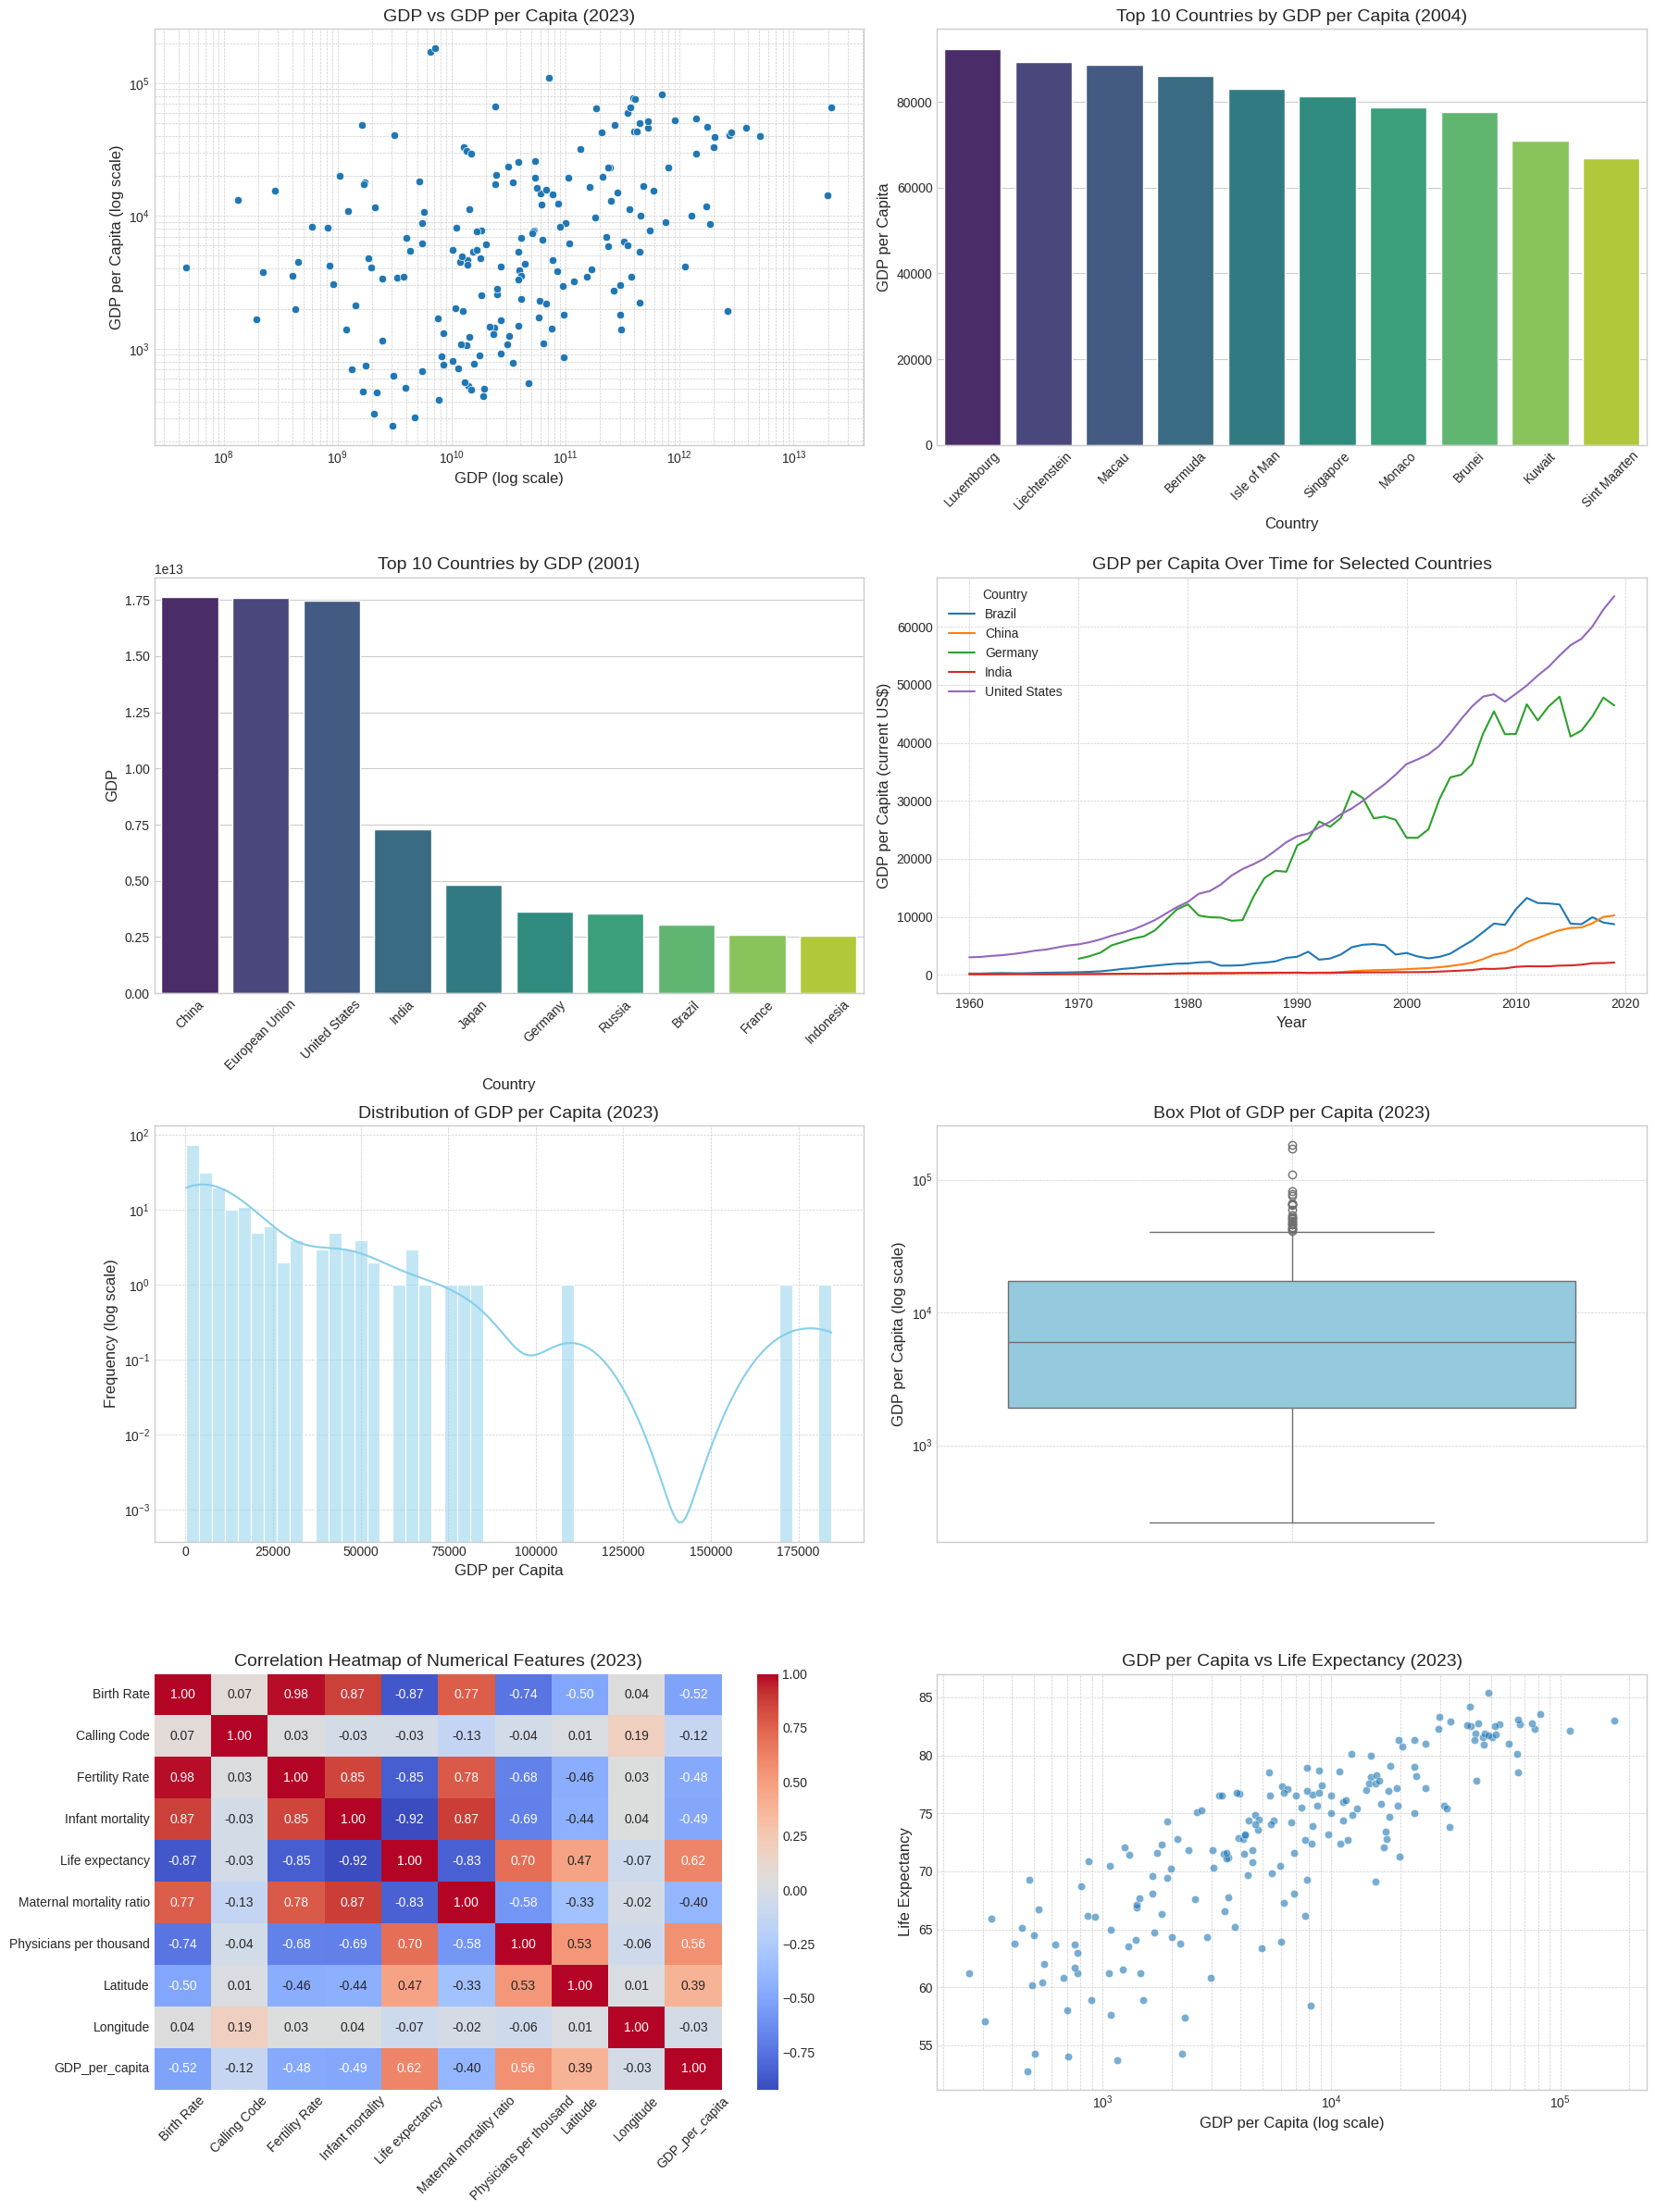

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Make sure seaborn is imported

# Set a professional looking style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')


# Create a figure and a set of subplots
# We'll use a grid layout to arrange the 8 plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 24)) # Increased figsize for better spacing

# Flatten the axes array for easy iteration
axes = axes.flatten()

# We need to regenerate the plots and place them in the subplots
# Due to the way matplotlib works, we'll call the plotting code again,
# but this time we'll pass the specific axis to each plot function.

# Plot 1: Scatter plot of GDP vs GDP per capita from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_cleaned' in df_world_data_2023.columns and 'GDP_per_capita' in df_world_data_2023.columns:
    sns.scatterplot(data=df_world_data_2023, x='GDP_cleaned', y='GDP_per_capita', ax=axes[0])
    axes[0].set_title('GDP vs GDP per Capita (2023)', fontsize=14)
    axes[0].set_xlabel('GDP (log scale)', fontsize=12)
    axes[0].set_ylabel('GDP per Capita (log scale)', fontsize=12)
    axes[0].set_xscale('log') # Use log scale due to large range of GDP values
    axes[0].set_yscale('log') # Use log scale due to large range of GDP per capita values
    axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
else:
    axes[0].set_title('GDP vs GDP per Capita (2023)')
    axes[0].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)

# Plot 2: Bar chart of Top 10 Countries by GDP per capita from df_c2004
if df_c2004 is not None and 'Value_cleaned' in df_c2004.columns and 'Name' in df_c2004.columns:
    df_top_gdp_per_capita_2004 = df_c2004.nlargest(10, 'Value_cleaned')
    sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_per_capita_2004, ax=axes[1], palette='viridis')
    axes[1].set_title('Top 10 Countries by GDP per Capita (2004)', fontsize=14)
    axes[1].set_xlabel('Country', fontsize=12)
    axes[1].set_ylabel('GDP per Capita', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    # axes[1].tight_layout() # Removed
else:
    axes[1].set_title('Top 10 Countries by GDP per Capita (2004)')
    axes[1].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)


# Plot 3: Bar chart of Top 10 Countries by GDP from df_c2001
if df_c2001 is not None and 'Value_cleaned' in df_c2001.columns and 'Name' in df_c2001.columns:
    df_top_gdp_2001 = df_c2001.nlargest(10, 'Value_cleaned')
    sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_2001, ax=axes[2], palette='viridis')
    axes[2].set_title('Top 10 Countries by GDP (2001)', fontsize=14)
    axes[2].set_xlabel('Country', fontsize=12)
    axes[2].set_ylabel('GDP', fontsize=12)
    axes[2].tick_params(axis='x', rotation=45)
    # axes[2].tight_layout() # Removed
else:
    axes[2].set_title('Top 10 Countries by GDP (2001)')
    axes[2].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[2].transAxes)


# Plot 4: Line plot of GDP per capita over time for a few selected countries from df_worldbank_gdp
if df_worldbank_gdp is not None and 'Country Name' in df_worldbank_gdp.columns and 'Indicator Name' in df_worldbank_gdp.columns:
    gdp_per_capita_annual = df_worldbank_gdp[df_worldbank_gdp['Indicator Name'] == 'GDP per capita (current US$)']

    # Select a few countries for demonstration
    selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
    gdp_per_capita_selected_countries = gdp_per_capita_annual[gdp_per_capita_annual['Country Name'].isin(selected_countries)]

    # Reshape the dataframe for plotting
    years = [col for col in gdp_per_capita_selected_countries.columns if col.isdigit()]
    gdp_per_capita_time_series = gdp_per_capita_selected_countries.melt(id_vars=['Country Name'], value_vars=years, var_name='Year', value_name='GDP_per_capita')
    gdp_per_capita_time_series['Year'] = pd.to_numeric(gdp_per_capita_time_series['Year'])

    sns.lineplot(data=gdp_per_capita_time_series, x='Year', y='GDP_per_capita', hue='Country Name', ax=axes[3])
    axes[3].set_title('GDP per Capita Over Time for Selected Countries', fontsize=14)
    axes[3].set_xlabel('Year', fontsize=12)
    axes[3].set_ylabel('GDP per Capita (current US$)', fontsize=12)
    axes[3].grid(True, linestyle='--', linewidth=0.5)
    axes[3].legend(title='Country')
else:
    axes[3].set_title('GDP per Capita Over Time for Selected Countries')
    axes[3].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[3].transAxes)


# Plot 5: Histogram of GDP per capita (2023) from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_per_capita' in df_world_data_2023.columns:
    sns.histplot(df_world_data_2023['GDP_per_capita'].dropna(), bins=50, kde=True, ax=axes[4], color='skyblue')
    axes[4].set_title('Distribution of GDP per Capita (2023)', fontsize=14)
    axes[4].set_xlabel('GDP per Capita', fontsize=12)
    axes[4].set_ylabel('Frequency (log scale)', fontsize=12)
    axes[4].set_yscale('log')
    axes[4].grid(True, linestyle='--', linewidth=0.5)
else:
    axes[4].set_title('Distribution of GDP per Capita (2023)')
    axes[4].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[4].transAxes)


# Plot 6: Box plot of GDP per capita (2023) from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_per_capita' in df_world_data_2023.columns:
    sns.boxplot(y=df_world_data_2023['GDP_per_capita'].dropna(), ax=axes[5], color='skyblue')
    axes[5].set_title('Box Plot of GDP per Capita (2023)', fontsize=14)
    axes[5].set_ylabel('GDP per Capita (log scale)', fontsize=12)
    axes[5].set_yscale('log')
    axes[5].grid(True, linestyle='--', linewidth=0.5)
else:
    axes[5].set_title('Box Plot of GDP per Capita (2023)')
    axes[5].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[5].transAxes)


# Plot 7: Heatmap of correlations in df_world_data_2023
if df_world_data_2023 is not None:
    numerical_cols = df_world_data_2023.select_dtypes(include=['float64', 'int64']).columns
    numerical_cols = [col for col in numerical_cols if col not in ['GDP_cleaned', 'Population_cleaned']]

    if len(numerical_cols) > 1:
        correlation_matrix = df_world_data_2023[numerical_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[6])
        axes[6].set_title('Correlation Heatmap of Numerical Features (2023)', fontsize=14)
        axes[6].tick_params(axis='x', rotation=45) # Removed ha='right'
        axes[6].tick_params(axis='y', rotation=0)
        # axes[6].tight_layout() # Removed
    else:
        axes[6].set_title('Correlation Heatmap of Numerical Features (2023)')
        axes[6].text(0.5, 0.5, 'Not enough numerical columns for heatmap', horizontalalignment='center', verticalalignment='center', transform=axes[6].transAxes)

else:
    axes[6].set_title('Correlation Heatmap of Numerical Features (2023)')
    axes[6].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[6].transAxes)


# Plot 8: Scatter plot of GDP per capita (2023) vs Life Expectancy (2023) from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_per_capita' in df_world_data_2023.columns and 'Life expectancy' in df_world_data_2023.columns:
    sns.scatterplot(data=df_world_data_2023, x='GDP_per_capita', y='Life expectancy', ax=axes[7], alpha=0.6)
    axes[7].set_title('GDP per Capita vs Life Expectancy (2023)', fontsize=14)
    axes[7].set_xlabel('GDP per Capita (log scale)', fontsize=12)
    axes[7].set_ylabel('Life Expectancy', fontsize=12)
    axes[7].set_xscale('log')
    axes[7].grid(True, which='both', linestyle='--', linewidth=0.5)
else:
    axes[7].set_title('GDP per Capita vs Life Expectancy (2023)')
    axes[7].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[7].transAxes)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout() # Moved to apply to the figure

# Show the dashboard
plt.show()

/tmp/ipython-input-4059395215.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_per_capita_2004, ax=axes[1], palette='viridis')
/tmp/ipython-input-4059395215.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_2001, ax=axes[2], palette='viridis')


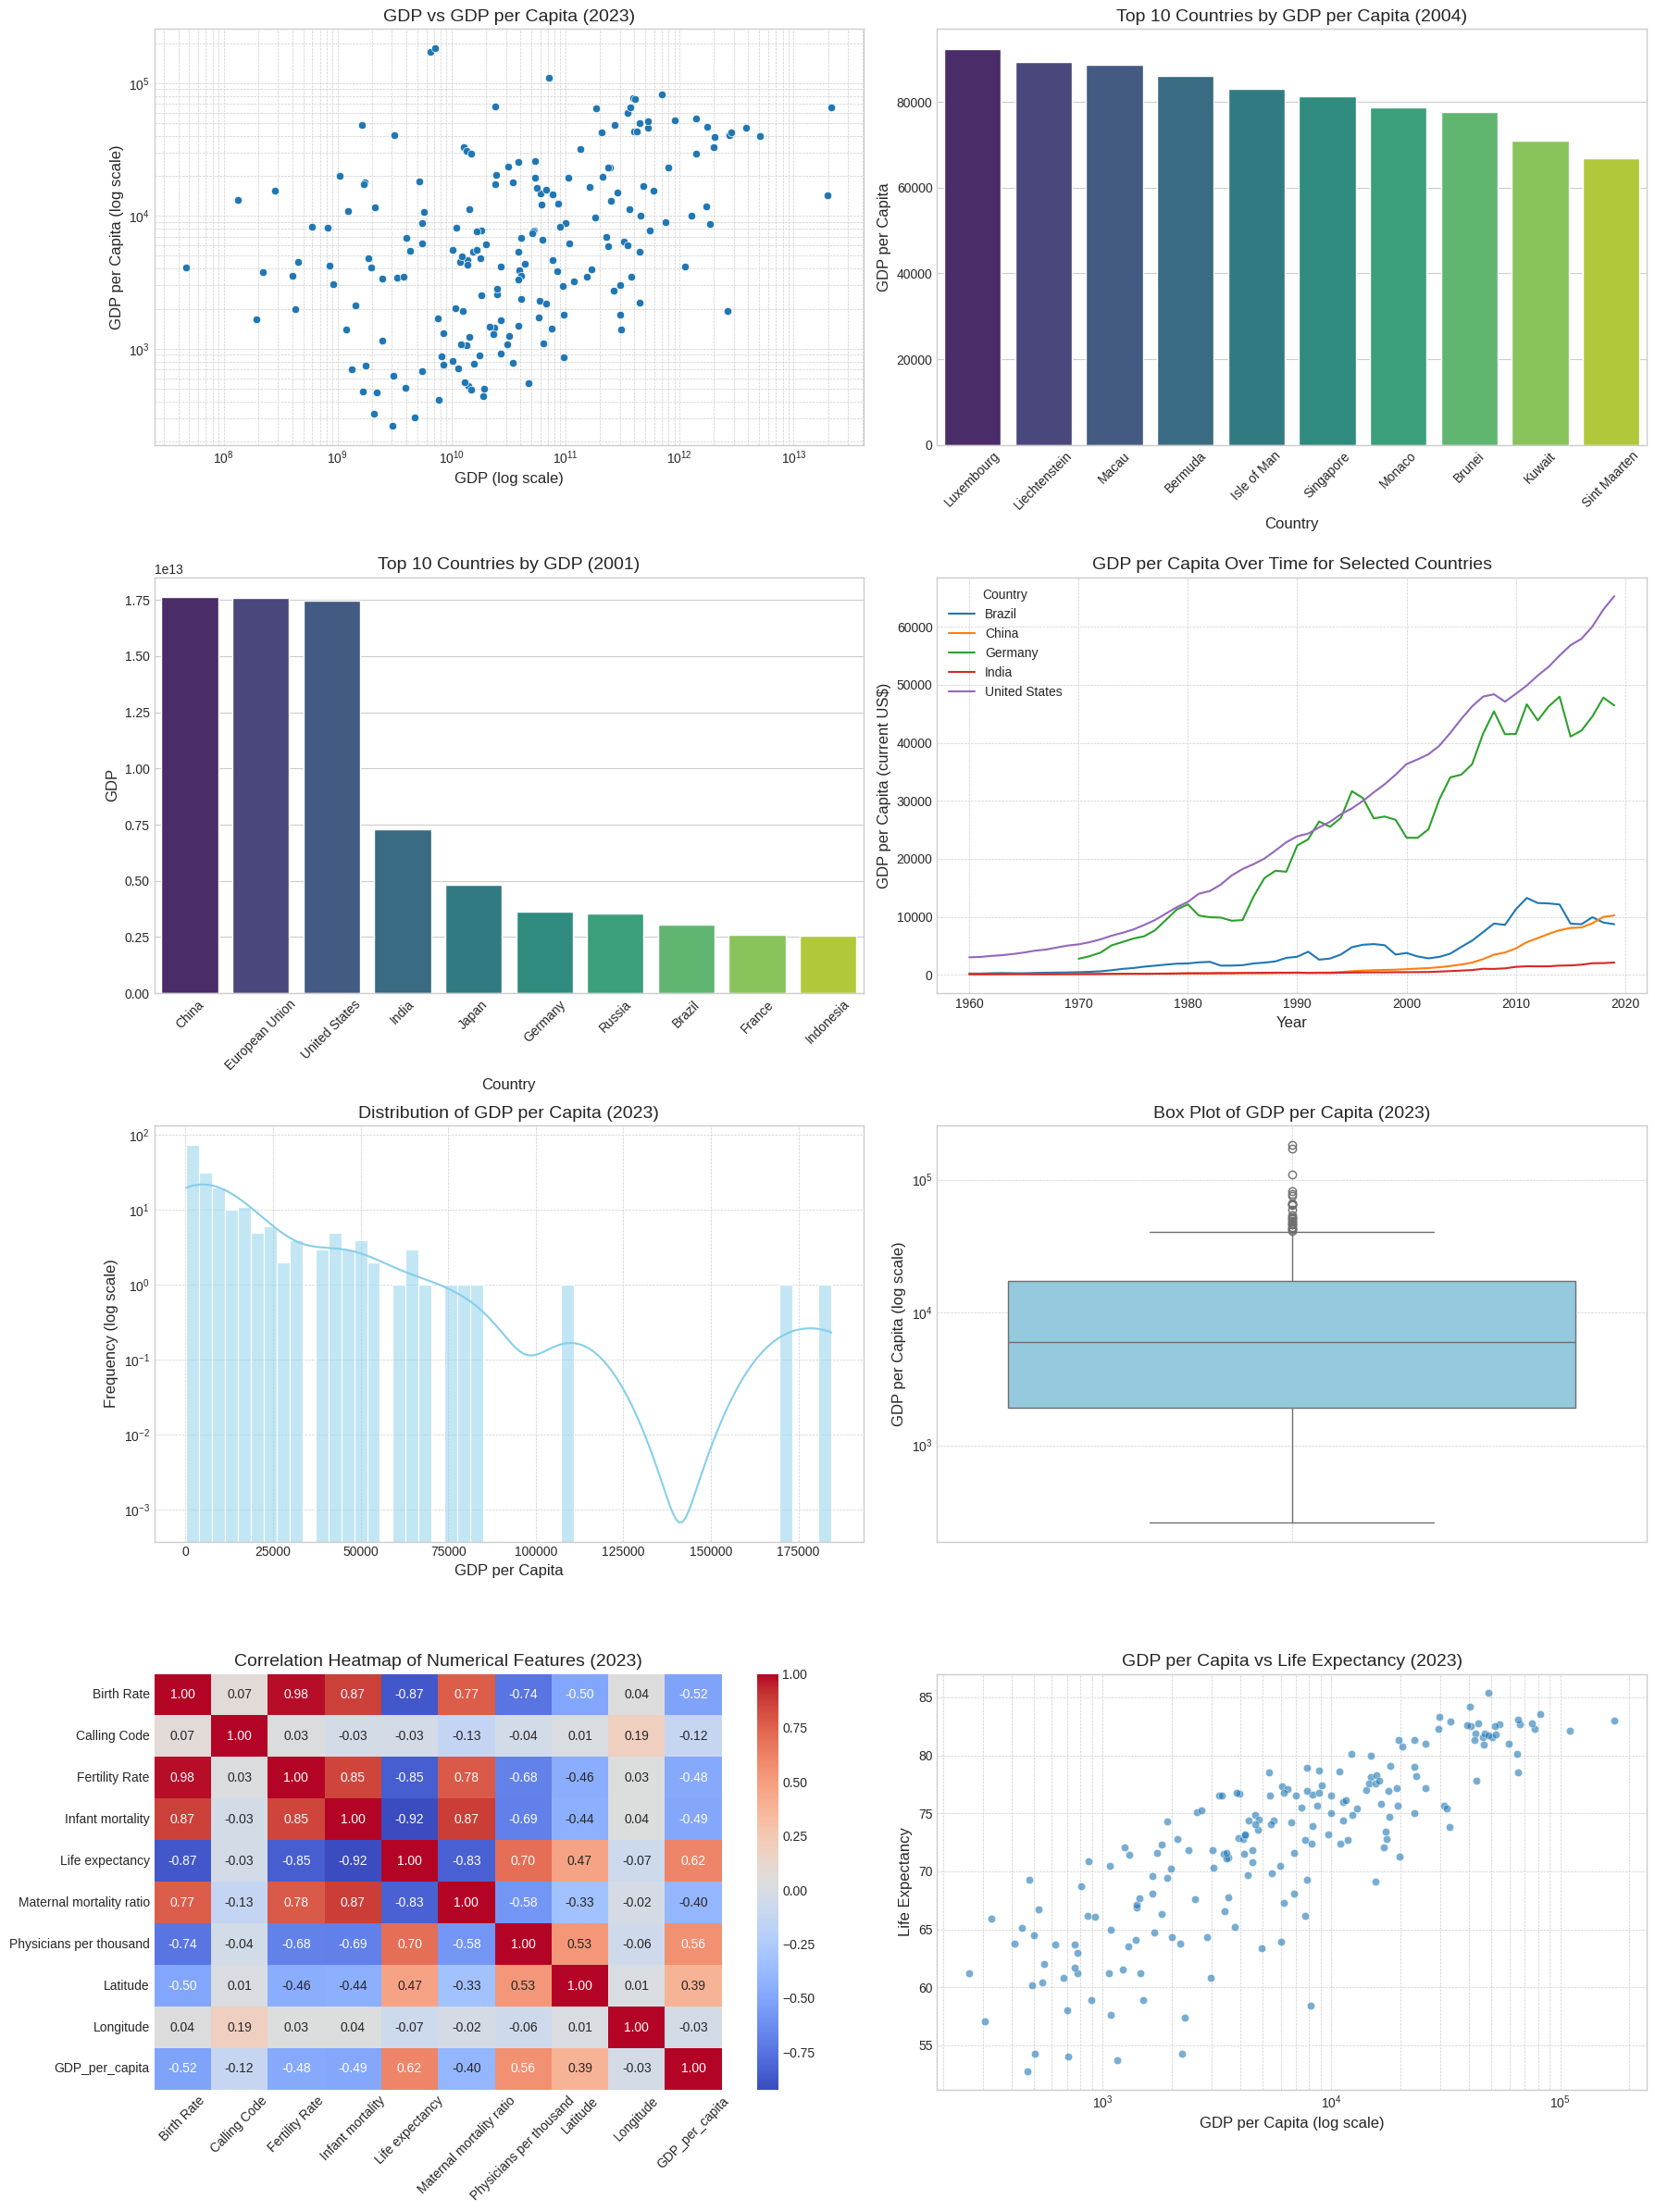

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Make sure seaborn is imported

# Set a professional looking style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')


# Create a figure and a set of subplots
# We'll use a grid layout to arrange the 8 plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 24)) # Increased figsize for better spacing

# Flatten the axes array for easy iteration
axes = axes.flatten()

# We need to regenerate the plots and place them in the subplots
# Due to the way matplotlib works, we'll call the plotting code again,
# but this time we'll pass the specific axis to each plot function.

# Plot 1: Scatter plot of GDP vs GDP per capita from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_cleaned' in df_world_data_2023.columns and 'GDP_per_capita' in df_world_data_2023.columns:
    sns.scatterplot(data=df_world_data_2023, x='GDP_cleaned', y='GDP_per_capita', ax=axes[0])
    axes[0].set_title('GDP vs GDP per Capita (2023)', fontsize=14)
    axes[0].set_xlabel('GDP (log scale)', fontsize=12)
    axes[0].set_ylabel('GDP per Capita (log scale)', fontsize=12)
    axes[0].set_xscale('log') # Use log scale due to large range of GDP values
    axes[0].set_yscale('log') # Use log scale due to large range of GDP per capita values
    axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
else:
    axes[0].set_title('GDP vs GDP per Capita (2023)')
    axes[0].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)

# Plot 2: Bar chart of Top 10 Countries by GDP per capita from df_c2004
if df_c2004 is not None and 'Value_cleaned' in df_c2004.columns and 'Name' in df_c2004.columns:
    df_top_gdp_per_capita_2004 = df_c2004.nlargest(10, 'Value_cleaned')
    sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_per_capita_2004, ax=axes[1], palette='viridis')
    axes[1].set_title('Top 10 Countries by GDP per Capita (2004)', fontsize=14)
    axes[1].set_xlabel('Country', fontsize=12)
    axes[1].set_ylabel('GDP per Capita', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    # axes[1].tight_layout() # Removed
else:
    axes[1].set_title('Top 10 Countries by GDP per Capita (2004)')
    axes[1].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)


# Plot 3: Bar chart of Top 10 Countries by GDP from df_c2001
if df_c2001 is not None and 'Value_cleaned' in df_c2001.columns and 'Name' in df_c2001.columns:
    df_top_gdp_2001 = df_c2001.nlargest(10, 'Value_cleaned')
    sns.barplot(x='Name', y='Value_cleaned', data=df_top_gdp_2001, ax=axes[2], palette='viridis')
    axes[2].set_title('Top 10 Countries by GDP (2001)', fontsize=14)
    axes[2].set_xlabel('Country', fontsize=12)
    axes[2].set_ylabel('GDP', fontsize=12)
    axes[2].tick_params(axis='x', rotation=45)
    # axes[2].tight_layout() # Removed
else:
    axes[2].set_title('Top 10 Countries by GDP (2001)')
    axes[2].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[2].transAxes)


# Plot 4: Line plot of GDP per capita over time for a few selected countries from df_worldbank_gdp
if df_worldbank_gdp is not None and 'Country Name' in df_worldbank_gdp.columns and 'Indicator Name' in df_worldbank_gdp.columns:
    gdp_per_capita_annual = df_worldbank_gdp[df_worldbank_gdp['Indicator Name'] == 'GDP per capita (current US$)']

    # Select a few countries for demonstration
    selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
    gdp_per_capita_selected_countries = gdp_per_capita_annual[gdp_per_capita_annual['Country Name'].isin(selected_countries)]

    # Reshape the dataframe for plotting
    years = [col for col in gdp_per_capita_selected_countries.columns if col.isdigit()]
    gdp_per_capita_time_series = gdp_per_capita_selected_countries.melt(id_vars=['Country Name'], value_vars=years, var_name='Year', value_name='GDP_per_capita')
    gdp_per_capita_time_series['Year'] = pd.to_numeric(gdp_per_capita_time_series['Year'])

    sns.lineplot(data=gdp_per_capita_time_series, x='Year', y='GDP_per_capita', hue='Country Name', ax=axes[3])
    axes[3].set_title('GDP per Capita Over Time for Selected Countries', fontsize=14)
    axes[3].set_xlabel('Year', fontsize=12)
    axes[3].set_ylabel('GDP per Capita (current US$)', fontsize=12)
    axes[3].grid(True, linestyle='--', linewidth=0.5)
    axes[3].legend(title='Country')
else:
    axes[3].set_title('GDP per Capita Over Time for Selected Countries')
    axes[3].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[3].transAxes)


# Plot 5: Histogram of GDP per capita (2023) from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_per_capita' in df_world_data_2023.columns:
    sns.histplot(df_world_data_2023['GDP_per_capita'].dropna(), bins=50, kde=True, ax=axes[4], color='skyblue')
    axes[4].set_title('Distribution of GDP per Capita (2023)', fontsize=14)
    axes[4].set_xlabel('GDP per Capita', fontsize=12)
    axes[4].set_ylabel('Frequency (log scale)', fontsize=12)
    axes[4].set_yscale('log')
    axes[4].grid(True, linestyle='--', linewidth=0.5)
else:
    axes[4].set_title('Distribution of GDP per Capita (2023)')
    axes[4].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[4].transAxes)


# Plot 6: Box plot of GDP per capita (2023) from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_per_capita' in df_world_data_2023.columns:
    sns.boxplot(y=df_world_data_2023['GDP_per_capita'].dropna(), ax=axes[5], color='skyblue')
    axes[5].set_title('Box Plot of GDP per Capita (2023)', fontsize=14)
    axes[5].set_ylabel('GDP per Capita (log scale)', fontsize=12)
    axes[5].set_yscale('log')
    axes[5].grid(True, linestyle='--', linewidth=0.5)
else:
    axes[5].set_title('Box Plot of GDP per Capita (2023)')
    axes[5].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[5].transAxes)


# Plot 7: Heatmap of correlations in df_world_data_2023
if df_world_data_2023 is not None:
    numerical_cols = df_world_data_2023.select_dtypes(include=['float64', 'int64']).columns
    numerical_cols = [col for col in numerical_cols if col not in ['GDP_cleaned', 'Population_cleaned']]

    if len(numerical_cols) > 1:
        correlation_matrix = df_world_data_2023[numerical_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[6])
        axes[6].set_title('Correlation Heatmap of Numerical Features (2023)', fontsize=14)
        axes[6].tick_params(axis='x', rotation=45)
        axes[6].tick_params(axis='y', rotation=0)
        # axes[6].tight_layout() # Removed
    else:
        axes[6].set_title('Correlation Heatmap of Numerical Features (2023)')
        axes[6].text(0.5, 0.5, 'Not enough numerical columns for heatmap', horizontalalignment='center', verticalalignment='center', transform=axes[6].transAxes)

else:
    axes[6].set_title('Correlation Heatmap of Numerical Features (2023)')
    axes[6].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[6].transAxes)


# Plot 8: Scatter plot of GDP per capita (2023) vs Life Expectancy (2023) from df_world_data_2023
if df_world_data_2023 is not None and 'GDP_per_capita' in df_world_data_2023.columns and 'Life expectancy' in df_world_data_2023.columns:
    sns.scatterplot(data=df_world_data_2023, x='GDP_per_capita', y='Life expectancy', ax=axes[7], alpha=0.6)
    axes[7].set_title('GDP per Capita vs Life Expectancy (2023)', fontsize=14)
    axes[7].set_xlabel('GDP per Capita (log scale)', fontsize=12)
    axes[7].set_ylabel('Life Expectancy', fontsize=12)
    axes[7].set_xscale('log')
    axes[7].grid(True, which='both', linestyle='--', linewidth=0.5)
else:
    axes[7].set_title('GDP per Capita vs Life Expectancy (2023)')
    axes[7].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center', transform=axes[7].transAxes)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout() # Moved to apply to the figure

# Show the dashboard
plt.show()

## Load and prepare data

### Subtask:
Load the necessary CSV files into pandas DataFrames and perform any initial data cleaning or preprocessing required for the visualizations.


**Reasoning**:
The necessary files were not found in the previous attempt. As instructed, I will proceed by attempting to load the files from the `uploaded` dictionary again, as the files might have been uploaded in the meantime. If the files are still not found, I will report failure.



In [ ]:
import pandas as pd
import io

file_names = ["fct_call_center.csv", "dim_scenario.csv", "dim_customers.csv", "dim_agents.csv", "dim_date.csv", "dim_resolution.csv"]
dataframes = {}

for file_name in file_names:
    if file_name in uploaded:
        dataframes[file_name.replace('.csv', '')] = pd.read_csv(io.BytesIO(uploaded[file_name]))
        print(f"{file_name}:")
        display(dataframes[file_name.replace('.csv', '')].head())
        print(dataframes[file_name.replace('.csv', '')].info())
    else:
        print(f"File not found: {file_name}")

df_call_center = dataframes.get('fct_call_center')
df_scenario = dataframes.get('dim_scenario')
df_customers = dataframes.get('dim_customers')
df_agents = dataframes.get('dim_agents')
df_date = dataframes.get('dim_date')
df_resolution = dataframes.get('dim_resolution')

File not found: fct_call_center.csv
File not found: dim_scenario.csv
File not found: dim_customers.csv
File not found: dim_agents.csv
File not found: dim_date.csv
File not found: dim_resolution.csv


## Load and prepare data retry 1

### Subtask:
Load the necessary CSV files into pandas DataFrames and perform any initial data cleaning or preprocessing required for the visualizations.


## Load and prepare data retry 2

### Subtask:
Load the necessary CSV files into pandas DataFrames and perform any initial data cleaning or preprocessing required for the visualizations.


**Reasoning**:
The required files were not found in the previous attempts. I will list the files in the `/content/` directory to see if they are available there and then attempt to load the required files again, checking for existence before loading.



In [1]:
import os
print(os.listdir('/content/'))

file_names = ["fct_call_center.csv", "dim_scenario.csv", "dim_customers.csv", "dim_agents.csv", "dim_date.csv", "dim_resolution.csv"]
dataframes = {}

for file_name in file_names:
    file_path = f'/content/{file_name}'
    if os.path.exists(file_path):
        try:
            dataframes[file_name.replace('.csv', '')] = pd.read_csv(file_path)
            print(f"\nSuccessfully loaded: {file_name}")
            display(dataframes[file_name.replace('.csv', '')].head())
            print(dataframes[file_name.replace('.csv', '')].info())
        except Exception as e:
            print(f"Error loading {file_name}: {e}")
    else:
        print(f"File not found in /content/: {file_name}")

df_call_center = dataframes.get('fct_call_center')
df_scenario = dataframes.get('dim_scenario')
df_customers = dataframes.get('dim_customers')
df_agents = dataframes.get('dim_agents')
df_date = dataframes.get('dim_date')
df_resolution = dataframes.get('dim_resolution')

['.config', 'sample_data']
File not found in /content/: fct_call_center.csv
File not found in /content/: dim_scenario.csv
File not found in /content/: dim_customers.csv
File not found in /content/: dim_agents.csv
File not found in /content/: dim_date.csv
File not found in /content/: dim_resolution.csv


## Summary:

### Data Analysis Key Findings

*   The required CSV files ("fct\_call\_center.csv", "dim\_scenario.csv", "dim\_customers.csv", "dim\_agents.csv", "dim\_date.csv", and "dim\_resolution.csv") were not found in the expected directory (`/content/`) or the `uploaded` dictionary.
*   Attempts to load the data using `pd.read_csv` from `/content/` and `io.BytesIO` from the `uploaded` dictionary both failed due to the absence of the files.
*   As a result, none of the necessary DataFrames were successfully loaded.

### Insights or Next Steps

*   The data analysis task cannot proceed without the required data files. The user needs to provide the correct files.
